<a href="https://colab.research.google.com/github/Mystery01092000/Data-Science-In-Action/blob/master/LoanClassificaiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
num_col = data.dtypes != 'object'
exclude_id = data.columns != 'Load_ID'
exclude_credit_history = data.columns != 'Credit_History'

In [8]:
num_columns = num_col[num_col & exclude_id & exclude_credit_history].index
num_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

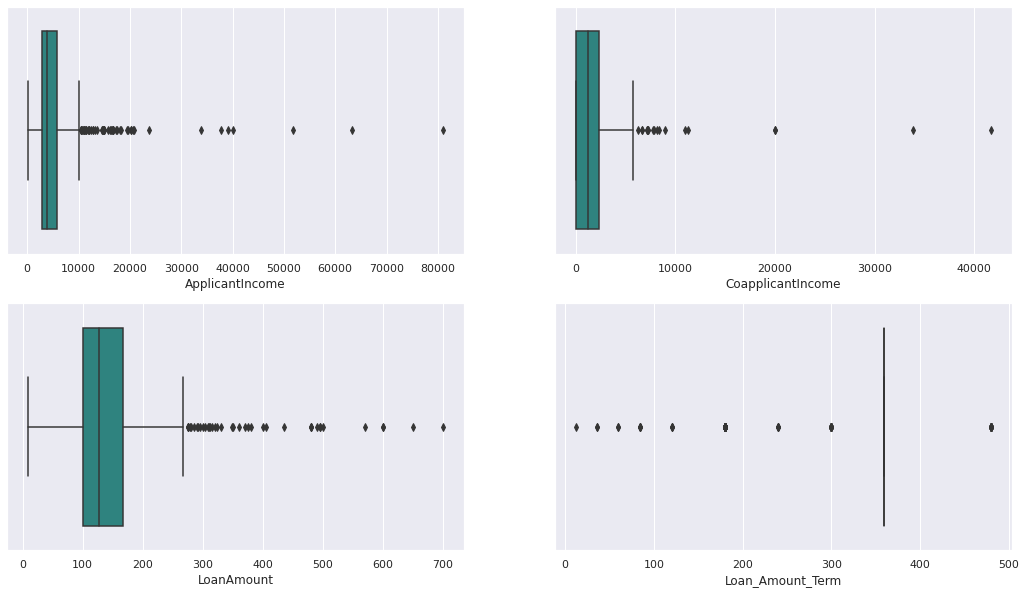

In [9]:
import seaborn as sns


i = 1
plt.figure(figsize=(18,10))
sns.set_theme(style='darkgrid')

for col in num_columns:
  plt.subplot(2,2, i)
  sns.boxplot(x = data[col], palette='viridis')
  i = i + 1

plt.show()


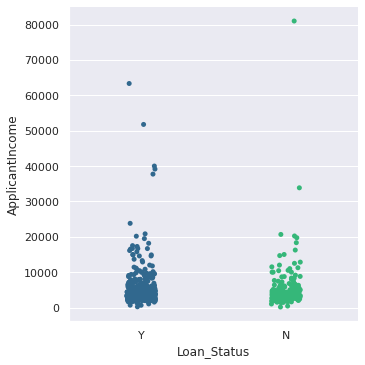

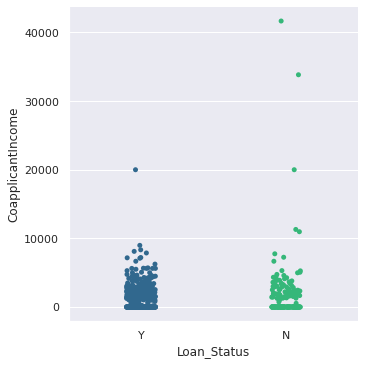

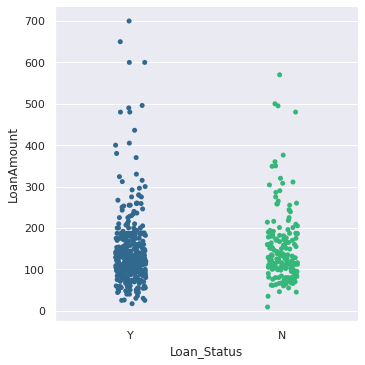

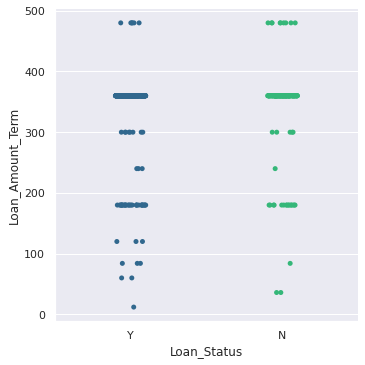

In [10]:
for col in num_columns:
    sns.catplot(x = 'Loan_Status', y=col, kind="strip", palette='viridis', data=data)
plt.show()

In [13]:
# Counting and checking categories in categorical data

obj_cols = data.dtypes == 'object'
exclude_loan_id = data.columns != 'Loan_ID'
exclude_loan_status = data.columns != 'Loan_Status'

cat_col = obj_cols[obj_cols & exclude_loan_id & exclude_loan_status].index
for col in cat_col:
  print(data[col].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


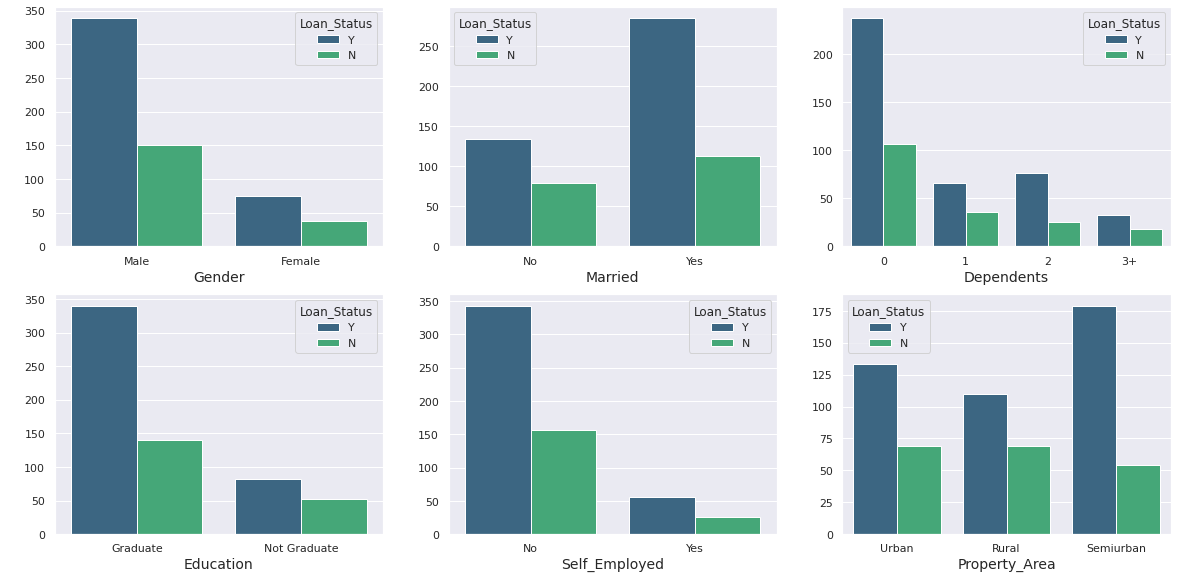

In [14]:
i = 1
plt.figure(figsize=(20,15))
for catcol in cat_col:
    plt.subplot(3,3, i)
    sns.countplot(x = catcol, data=data, palette='viridis', hue='Loan_Status')
    plt.xlabel(catcol, fontsize=14)
    plt.ylabel(' ')
    i = i + 1
plt.show()


# **Outlier treatment**

In [15]:
df_train = data.copy()
df_train.shape

(614, 13)

In [18]:
#Dropping the outliers according to Applicant Income column
AI = (df_train['ApplicantIncome'] > 30000 ) | (df_train['ApplicantIncome'] < 1000)
df_train.drop(df_train[AI].index, axis=0, inplace=True)


In [19]:
CAI = (df_train['CoapplicantIncome'] > 12000)
df_train.drop(df_train[CAI].index, axis=0, inplace=True)

In [21]:
LA = (df_train['LoanAmount'] > 400) | (df_train['LoanAmount'] < 40)
df_train.drop(df_train[LA].index, axis=0, inplace=True)

In [22]:
LAT = (df_train['Loan_Amount_Term'] > 400) | (df_train['Loan_Amount_Term'] < 100)
df_train.drop(df_train[LA].index, axis=0, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [23]:
df_train.reset_index(drop=True, inplace=True)
df_train.shape

(579, 13)

In [24]:
data.shape[0] - df_train.shape[0]

35

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            579 non-null    object 
 1   Gender             568 non-null    object 
 2   Married            576 non-null    object 
 3   Dependents         564 non-null    object 
 4   Education          579 non-null    object 
 5   Self_Employed      551 non-null    object 
 6   ApplicantIncome    579 non-null    int64  
 7   CoapplicantIncome  579 non-null    float64
 8   LoanAmount         557 non-null    float64
 9   Loan_Amount_Term   565 non-null    float64
 10  Credit_History     532 non-null    float64
 11  Property_Area      579 non-null    object 
 12  Loan_Status        579 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 58.9+ KB


# **Missing value Treatment**

In [26]:
# Coping the data 
df_cp = df_train.copy()

In [31]:
col_missing_value = df_cp.isna().sum()
col_missing_value = col_missing_value[col_missing_value > 0]

print(col_missing_value)
print(col_missing_value.sum())

Gender              11
Married              3
Dependents          15
Self_Employed       28
LoanAmount          22
Loan_Amount_Term    14
Credit_History      47
dtype: int64
140


In [32]:
total_number_of_cells = data.shape[0]*data.shape[1]
print("Total Cells: ", total_number_of_cells)
print("Total missing value : ", col_missing_value.sum())
print("Percentage of missing valuue: ", (col_missing_value.sum()/total_number_of_cells)*100)

Total Cells:  7982
Total missing value :  140
Percentage of missing valuue:  1.7539463793535455


In [33]:
df_cp.LoanAmount.describe()

count    557.000000
mean     138.012567
std       58.731080
min       40.000000
25%      100.000000
50%      127.000000
75%      161.000000
max      400.000000
Name: LoanAmount, dtype: float64

In [34]:
df_cp.Loan_Amount_Term.describe()

count    565.000000
mean     342.796460
std       63.370765
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [35]:
df_cp['LoanAmount'].fillna(df_cp['LoanAmount'].mean(), inplace = True)
df_cp['Loan_Amount_Term'].fillna(df_cp['Loan_Amount_Term'].mean(), inplace = True)

In [36]:
df_cp['Credit_History'].describe()

count    532.000000
mean       0.838346
std        0.368480
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [37]:
# It is because it has only values 0 and 1 possible 
df_cp['Credit_History'].fillna(df_cp['Credit_History'].quantile(0.25), inplace=True)

In [40]:
# We have successfully filled all the numerical columns 

# Now checking the remaining categorical column
col_missing_value = df_cp.isna().sum()
col_missing_value = col_missing_value[col_missing_value > 0]

print(col_missing_value)

Gender           11
Married           3
Dependents       15
Self_Employed    28
dtype: int64


In [42]:
# Filling categorical missing values with the number of count

col_miss = ['Gender', 'Married', 'Dependents', 'Self_Employed']

for col in col_miss:
  df_cp[col].fillna(df_cp[col].value_counts().index[0], inplace = True)

In [44]:
df_cp.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **Converting Categorical values to Numerical**

In [45]:
cat_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

my_df_encoded = pd.DataFrame(encoder.fit_transform(df_cp[cat_col])) # Encoding our categorical columns 

my_df_encoded.columns = encoder.get_feature_names(cat_col) # One Hot Encoder remove colmuns names so we need to put them back

df_cp.drop(cat_col ,axis=1, inplace=True) # We drop the old categorical columns in our original df

my_df_encoded = pd.concat([df_cp, my_df_encoded], axis=1) # We concat the encoded columns with the numerical columns of our original df

In [48]:
my_df_encoded.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,138.012567,360.0,1.0,Y,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,LP001003,4583,1508.0,128.000000,360.0,1.0,N,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,LP001005,3000,0.0,66.000000,360.0,1.0,Y,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,LP001006,2583,2358.0,120.000000,360.0,1.0,Y,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,LP001008,6000,0.0,141.000000,360.0,1.0,Y,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [49]:
my_df_encoded.shape

(579, 22)

In [50]:
my_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  579 non-null    object 
 1   ApplicantIncome          579 non-null    int64  
 2   CoapplicantIncome        579 non-null    float64
 3   LoanAmount               579 non-null    float64
 4   Loan_Amount_Term         579 non-null    float64
 5   Credit_History           579 non-null    float64
 6   Loan_Status              579 non-null    object 
 7   Gender_Female            579 non-null    float64
 8   Gender_Male              579 non-null    float64
 9   Married_No               579 non-null    float64
 10  Married_Yes              579 non-null    float64
 11  Dependents_0             579 non-null    float64
 12  Dependents_1             579 non-null    float64
 13  Dependents_2             579 non-null    float64
 14  Dependents_3+            5

In [53]:
# We can see our target is still categorical
# Converting Loan_Status to a numerical value/Binary

lb = preprocessing.LabelBinarizer()
target_encode = pd.DataFrame(lb.fit_transform(my_df_encoded['Loan_Status']), columns=['Loan_Status'])

In [54]:
target = target_encode
my_df_encoded.drop('Loan_Status', axis=1)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,138.012567,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,LP001003,4583,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,LP001005,3000,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,LP001006,2583,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,LP001008,6000,0.0,141.000000,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,LP002978,2900,0.0,71.000000,360.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
575,LP002979,4106,0.0,40.000000,180.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
576,LP002983,8072,240.0,253.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
577,LP002984,7583,0.0,187.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [56]:

my_df_encoded = pd.concat([target_encode, my_df_encoded], axis=1)

In [57]:
my_df_encoded.head()

,Loan_Status,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,LP001002,5849,0.0,138.012567,360.0,1.0,Y,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,LP001003,4583,1508.0,128.000000,360.0,1.0,N,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,LP001005,3000,0.0,66.000000,360.0,1.0,Y,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,LP001006,2583,2358.0,120.000000,360.0,1.0,Y,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,1,LP001008,6000,0.0,141.000000,360.0,1.0,Y,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# **Feature Selection**

In [58]:
my_df_encoded.shape

(579, 23)

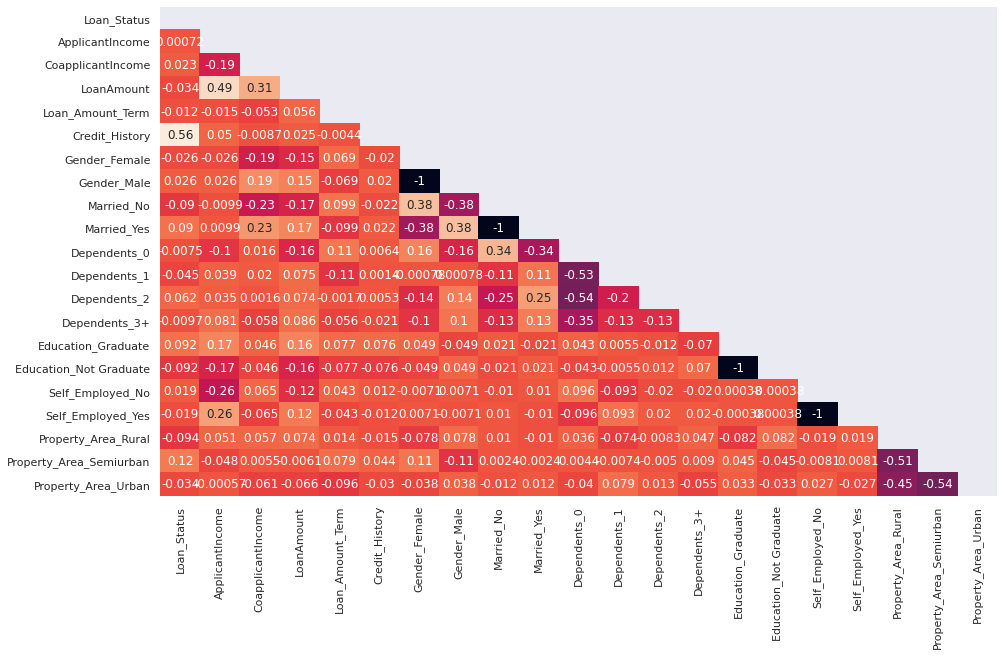

In [62]:
# As we can see we have 22 features to work with,
# The more features we have the model will take more time 
# Also the complexity of the project will increase tooo

correlation = my_df_encoded.corr()
matrix = np.triu(correlation)

plt.figure(figsize=(15,9))
sns.heatmap(correlation, mask = matrix, annot=True, cbar=False)